<a href="https://colab.research.google.com/github/AleksandrSosnin/Project_Analist/blob/main/Project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [45]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import norm, shapiro, ttest_ind
from statsmodels.stats.power import TTestIndPower
import scipy.stats as stats

In [46]:
uploaded = files.upload()

Saving ab_stats.csv to ab_stats (4).csv


In [47]:
print(uploaded.keys())

dict_keys(['ab_stats (4).csv'])


In [49]:
df = pd.read_csv(io.BytesIO(uploaded['ab_stats (4).csv']))
print(df)

       revenue  num_purchases  purchase ab_group  av_site visit
0          0.0              0         0        A       9.040174
1          0.0              0         0        A       4.811628
2          0.0              0         0        A       7.342623
3          0.0              0         0        A       7.744581
4          0.0              0         0        A      10.511814
...        ...            ...       ...      ...            ...
23647      0.0              0         0        B      10.207152
23648      0.0              0         0        B       5.148761
23649      0.0              0         0        B       4.809019
23650      0.0              0         0        B       8.127488
23651      0.0              0         0        B       8.928102

[23652 rows x 5 columns]


In [51]:

# Загрузка данных из файла
data = pd.read_csv('ab_stats (4).csv')

# Фильтруем данные для пользователей, которые сделали покупку
group_a = data[data['ab_group'] == 'A']
group_b = data[data['ab_group'] == 'B']

# Рассчитываем ARPPU для каждой группы
group_a_arppu = group_a[group_a['purchase'] == 1]['revenue'].sum() / group_a[group_a['purchase'] == 1]['num_purchases'].sum()
group_b_arppu = group_b[group_b['purchase'] == 1]['revenue'].sum() / group_b[group_b['purchase'] == 1]['num_purchases'].sum()

# Выполняем t-тест для независимых выборок (если данные нормальны)
t_stat, p_value = stats.ttest_ind(group_a['revenue'], group_b['revenue'])

# Выводим результаты
print(f"ARPPU для группы A: {group_a_arppu}")
print(f"ARPPU для группы B: {group_b_arppu}")
print(f"t-statistic: {t_stat}, p-value: {p_value}")

if p_value < 0.05:
    print("Различие в ARPPU статистически значимо!")
else:
    print("Различие в ARPPU незначимо.")


ARPPU для группы A: 7.978013286666666
ARPPU для группы B: 6.711683965197213
t-statistic: 1.28461147126436, p-value: 0.1989406702645873
Различие в ARPPU незначимо.


Необходимый размер выборки для A/B теста: 11305 пользователей на каждую группу


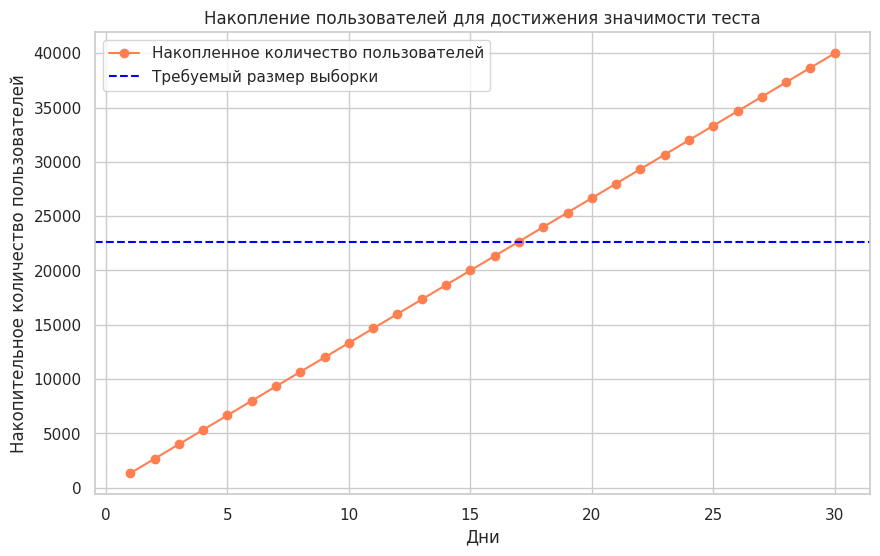

In [28]:
sns.set(style="whitegrid")

# Параметры задачи
baseline_conversion = 0.05   # Текущая конверсия
expected_increase = 0.002    # Ожидаемый прирост конверсии
alpha = 0.03                 # Уровень доверия (3% для доверительного уровня 97%)
power = 0.87                 # Уровень мощности
monthly_visitors = 40000     # Ежемесячное количество посетителей

# 2) Расчет размера выборки для A/B теста
effect_size = expected_increase / baseline_conversion  # Размер эффекта
analysis = TTestIndPower()
sample_size = analysis.solve_power(effect_size=effect_size, alpha=alpha, power=power, alternative='larger')
sample_size = int(np.ceil(sample_size))  # Округление до целого

print(f"Необходимый размер выборки для A/B теста: {sample_size} пользователей на каждую группу")

# Визуализация 1: Накопительное количество пользователей и достижение значимости
days = np.arange(1, 31)
daily_visitors = monthly_visitors / 30  # Среднее количество пользователей в день
cumulative_users = daily_visitors * days  # Накопленное количество пользователей за каждый день

plt.figure(figsize=(10, 6))
plt.plot(days, cumulative_users, color="coral", marker='o', label="Накопленное количество пользователей")
plt.axhline(sample_size * 2, color="blue", linestyle="--", label="Требуемый размер выборки")
plt.title("Накопление пользователей для достижения значимости теста")
plt.xlabel("Дни")
plt.ylabel("Накопительное количество пользователей")
plt.legend()
plt.show()


Необходимое количество дней для теста: 17.0 дней
Конверсия для варианта 1: 221.14%, прирост конверсии: 216.14%
Конверсия для варианта 2: 265.37%, прирост конверсии: 260.37%
Конверсия для варианта 3: 283.06%, прирост конверсии: 278.06%


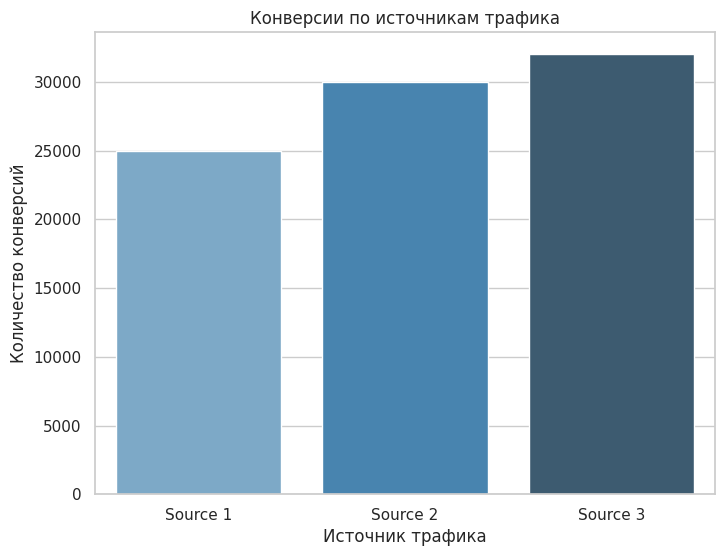

In [30]:
# 3) Подсчет времени для достижения значимости теста
days_to_significance = (sample_size * 2) / daily_visitors  # Делим на пользователей в день
print(f"Необходимое количество дней для теста: {np.ceil(days_to_significance)} дней")

# 3.1) Результаты тестирования при различных конверсиях
conversions = [25000, 30000, 32000]
for i, conv in enumerate(conversions, start=1):
    lift = (conv / sample_size) - baseline_conversion
    print(f"Конверсия для варианта {i}: {conv/sample_size*100:.2f}%, прирост конверсии: {lift*100:.2f}%")

# Визуализация 3: Конверсии по источникам трафика
plt.figure(figsize=(8, 6))
traffic_sources = ['Source 1', 'Source 2', 'Source 3']
sns.barplot(x=traffic_sources, y=conversions, palette="Blues_d", hue=traffic_sources)
plt.title("Конверсии по источникам трафика")
plt.xlabel("Источник трафика")
plt.ylabel("Количество конверсий")
plt.show()


Тест Шапиро-Уилка для CPA: p-value = 0.5725979768665519
Распределение CPA является нормальным.


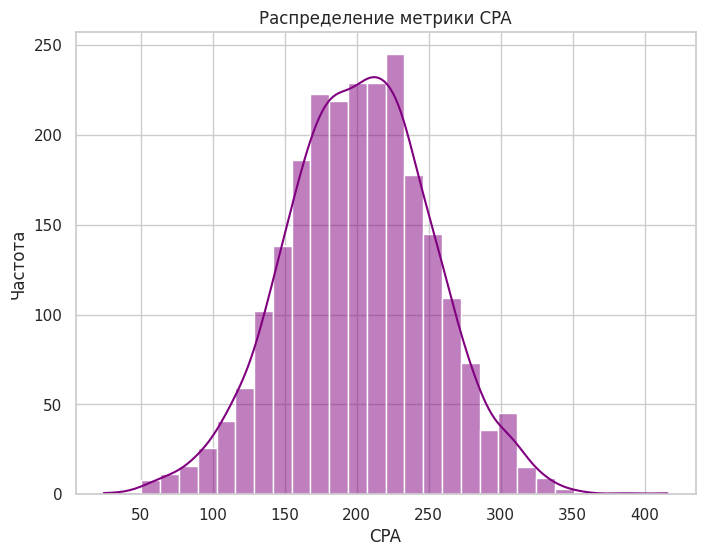

In [31]:
# 4) Проверка нормальности CPA с критерием Шапиро-Уилка
sample_size_cpa = 2350  # Размер выборки для CPA
alpha_cpa = 0.05
cpa_values = np.random.normal(200, 50, sample_size_cpa)  # Генерация данных CPA

stat, p_value = shapiro(cpa_values)
print(f"Тест Шапиро-Уилка для CPA: p-value = {p_value}")
if p_value < alpha_cpa:
    print("Распределение CPA не является нормальным.")
else:
    print("Распределение CPA является нормальным.")

# Визуализация 4: Распределение CPA
plt.figure(figsize=(8, 6))
sns.histplot(cpa_values, bins=30, kde=True, color="purple")
plt.title("Распределение метрики CPA")
plt.xlabel("CPA")
plt.ylabel("Частота")
plt.show()


Результаты t-теста для времени на сайте: p-value = 8.080909752232548e-39
Различие во времени на сайте является статистически значимым.


<ipython-input-40-4d9bb4b6a0bc>:22: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x="Группа", y="Время на сайте (сек)", data=timespent_data, palette="Set2")


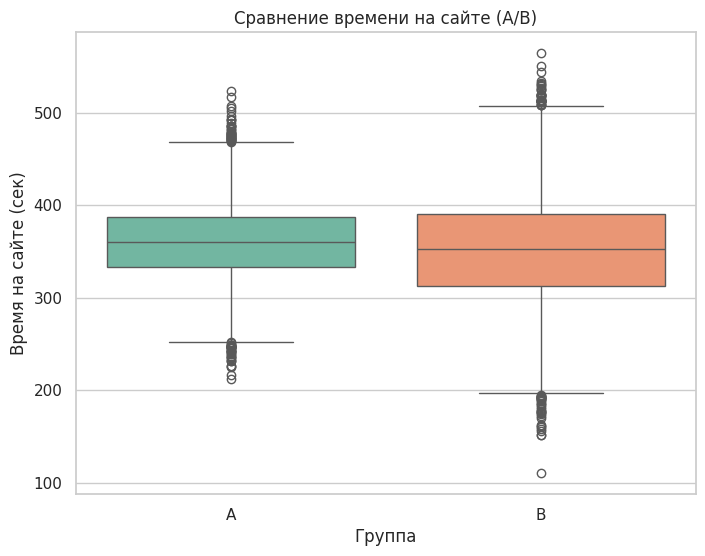

In [40]:
# 5) Проверка значимости среднего времени на сайте между группами A и B
mean_a, std_a, n_a = 360, 40, 9802
mean_b, std_b, n_b = 352, 58, 9789

# Сравнение средних с t-тестом
t_stat, p_value_ab = ttest_ind(np.random.normal(mean_a, std_a, n_a), np.random.normal(mean_b, std_b, n_b), equal_var=False)
print(f"Результаты t-теста для времени на сайте: p-value = {p_value_ab}")
if p_value_ab < 0.2:
    print("Различие во времени на сайте является статистически значимым.")
else:
    print("Различие во времени на сайте не является статистически значимым.")

# Визуализация 5: Сравнение времени на сайте (A/B)
average_timespent_A = np.random.normal(mean_a, std_a, n_a)
average_timespent_B = np.random.normal(mean_b, std_b, n_b)
timespent_data = pd.DataFrame({
    "Время на сайте (сек)": np.concatenate([average_timespent_A, average_timespent_B]),
    "Группа": ['A'] * n_a + ['B'] * n_b
})

plt.figure(figsize=(8, 6))
sns.boxplot(x="Группа", y="Время на сайте (сек)", data=timespent_data, palette="Set2")
plt.title("Сравнение времени на сайте (A/B)")
plt.xlabel("Группа")
plt.ylabel("Время на сайте (сек)")
plt.show()